# TELECOM CUSTOMER CHURN PREDICTION
This project aims to analyse customer data based and predict the percentage of customers churning out of the company's services based on multiple parameters provided like age, gender, services subscribed to, partner, dependents, tenure, payment method, monthly and total charges.

# Exploratory Data Analysis
In this section, we will be exploring the customer data, and analysing it by plotting different charts, comparing values, parameters etc.

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import tensorflow as tf
from tensorflow import keras
from collections import Counter
from imblearn.combine import SMOTEENN, SMOTETomek

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Customer Churn Prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv')
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
#Check for duplicates and nulls. There are 11 null values. Lets convert these null values to 0 for total charges.
null = data.isnull()
duplicates  = data.duplicated()
print(duplicates.sum())
print(null.sum())

0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [4]:
#First we converted our object data-type to float64(this was implemented in cell-10). Now we can convert null values to a 0
data['TotalCharges']= data['TotalCharges'].fillna(0)

In [5]:
#Lets see any additional information on the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
#We notice that the total charges are a number, yet Its an object data-type so lets convert it to float64
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
#In data.info() we can successfully see that TotalCharges has been converted to float64
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
#Lets look into various statistical parameters of the data now
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


Churn
No     5174
Yes    1869
Name: count, dtype: int64
36.122922303826826 % of people have churned out in the given data


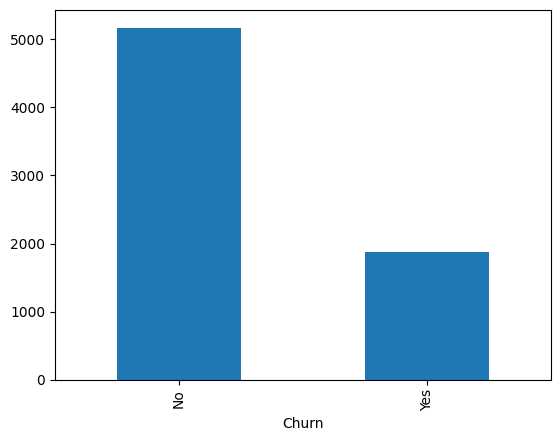

In [8]:
print(data['Churn'].value_counts())
data['Churn'].value_counts().plot(kind='bar')
percent = float((1869/5174)*100)
print(percent,'% of people have churned out in the given data')

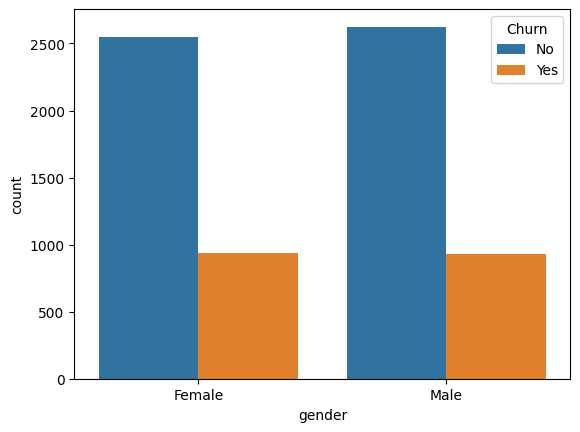

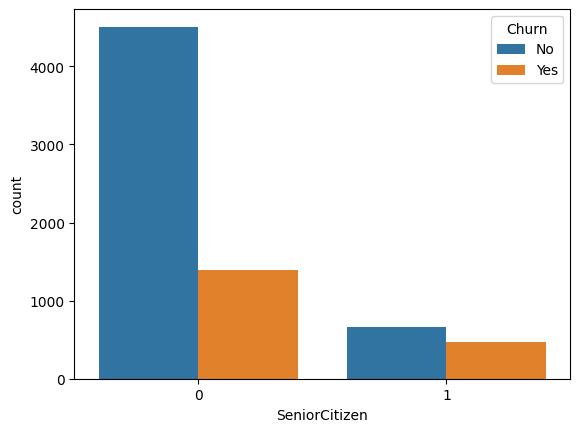

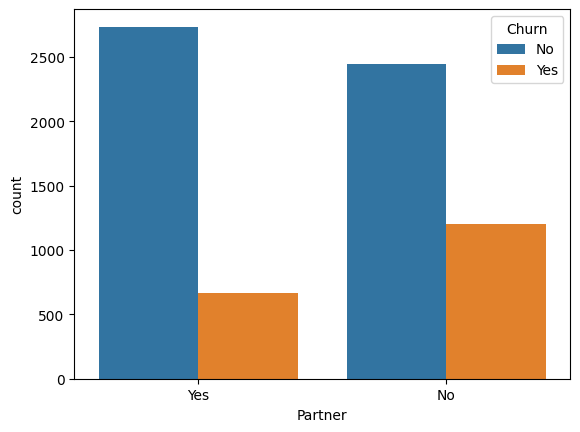

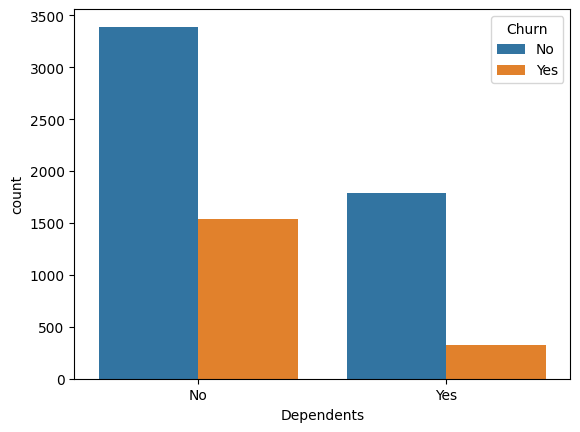

In [9]:
sns.countplot(x='gender',hue='Churn', data=data)
plt.show()
sns.countplot(x='SeniorCitizen',hue='Churn', data=data)
plt.show()
sns.countplot(x='Partner',hue='Churn', data=data)
plt.show()
sns.countplot(x='Dependents',hue='Churn', data=data)
plt.show()

In [10]:
fig = px.histogram(data, x='MonthlyCharges', color='Churn', barmode='overlay')
fig.show()

In [11]:
fig = px.histogram(data, x='TotalCharges', color='Churn', barmode='overlay')
fig.show()

In [12]:
fig = px.histogram(data, x='MonthlyCharges', y='TotalCharges', color='Churn',barmode='overlay')
fig.show()

In [13]:
fig = px.scatter(data, x='MonthlyCharges', y='TotalCharges', color='Churn')
fig.show()

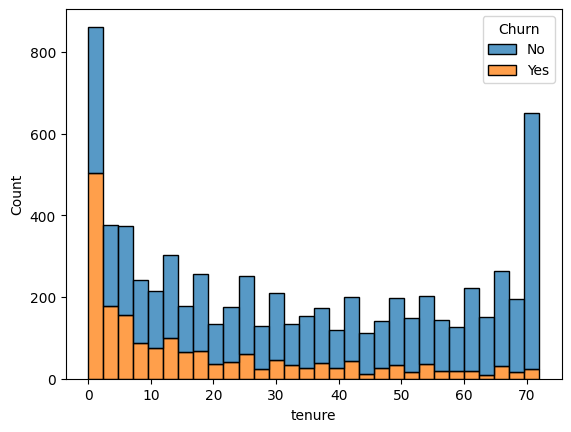

In [14]:
sns.histplot(x='tenure',hue='Churn', multiple='stack', bins = 30, data=data)
plt.show()

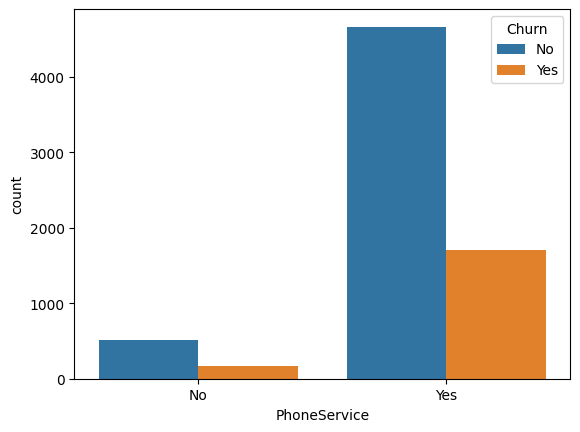

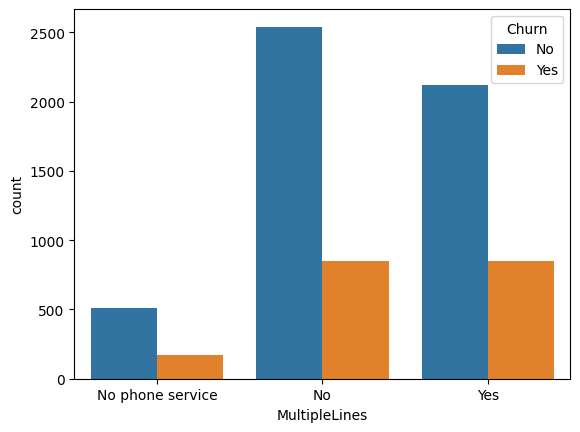

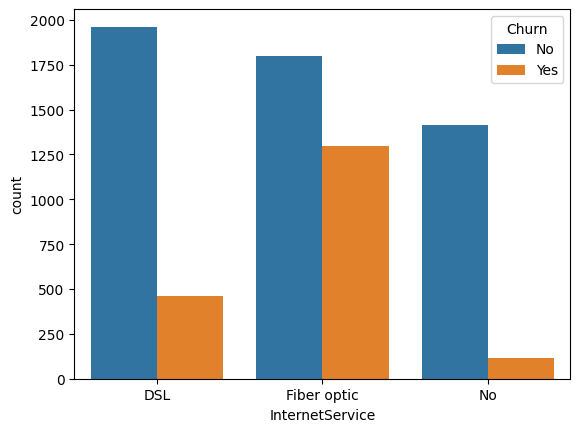

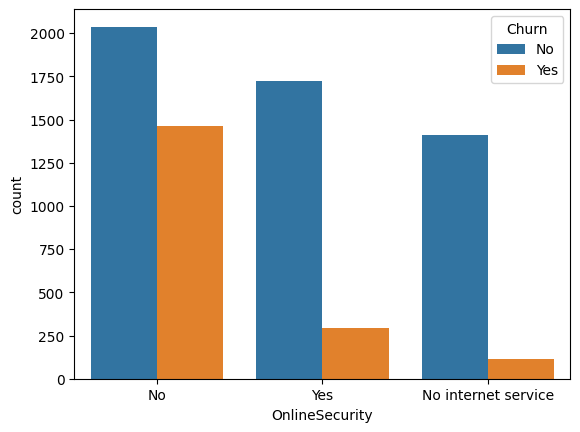

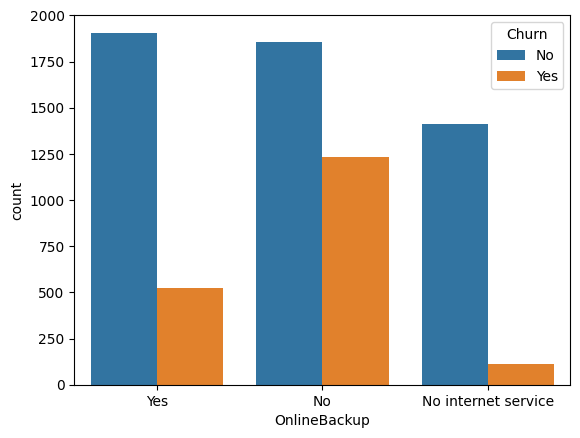

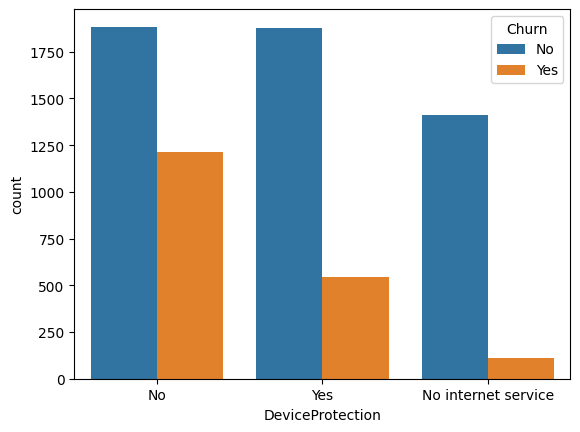

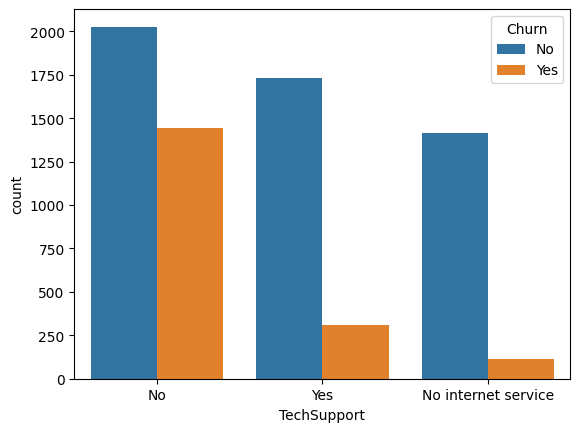

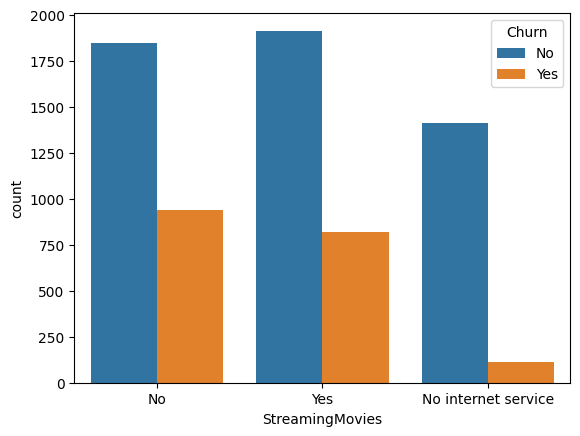

In [15]:
services = ['PhoneService',	'MultipleLines',	'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingMovies',]
for service in services:
  sns.countplot(x=service, hue='Churn', data=data)
  plt.show()

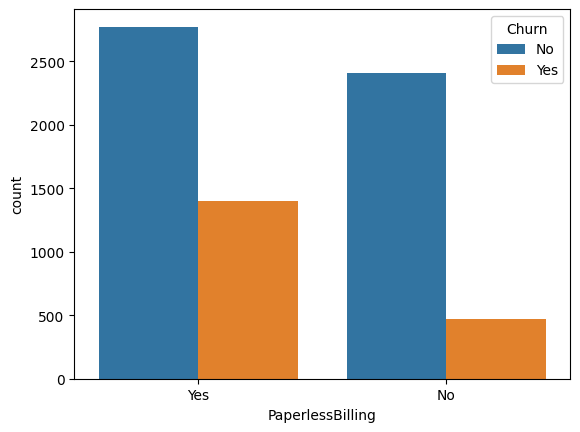

In [16]:
sns.countplot(x='PaperlessBilling', hue='Churn', data=data)
plt.show()

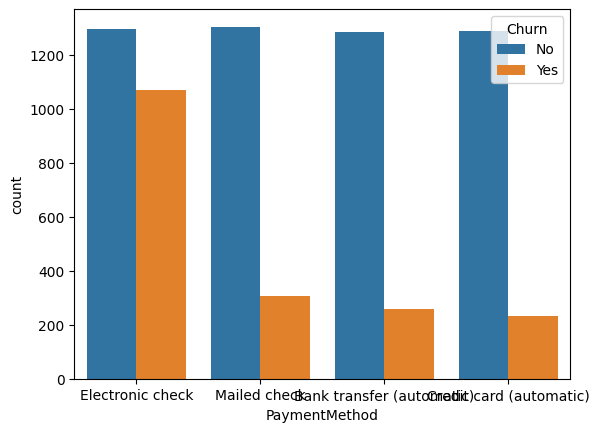

In [17]:
sns.countplot(x='PaymentMethod', hue='Churn', data=data)
plt.show()

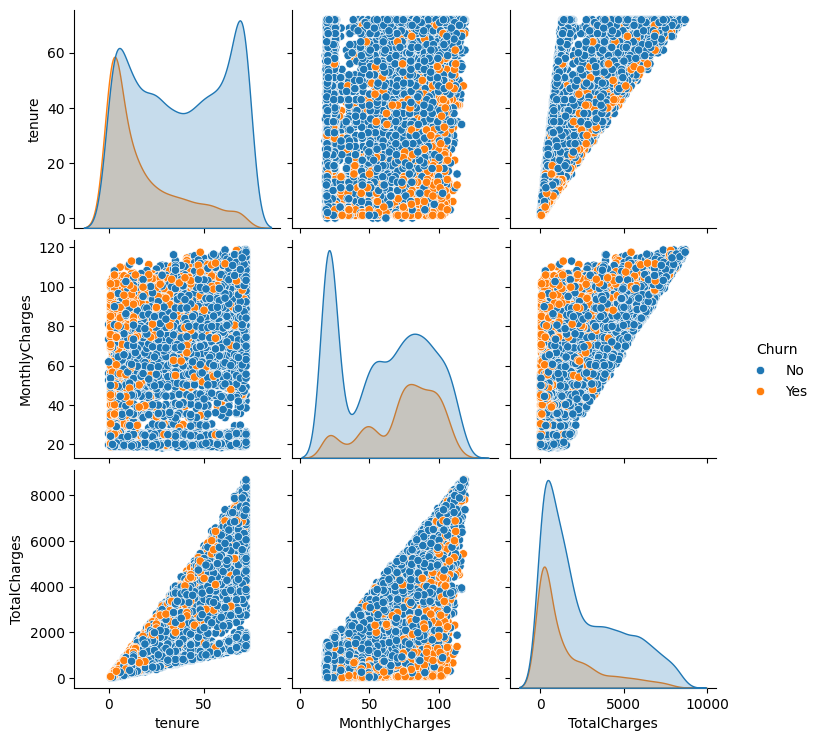

In [18]:
sns.pairplot(data, vars=['tenure', 'MonthlyCharges', 'TotalCharges'], hue='Churn')
plt.show()

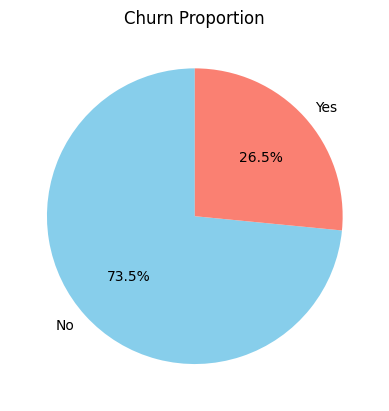

In [19]:
data['Churn'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
plt.title('Churn Proportion')
plt.ylabel('')
plt.show()

# Data Pre-Processing

In [20]:
enc_data = data
enc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [21]:
print(enc_data.sample(10))
print(enc_data['Contract'].value_counts())

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
1330  0661-WCQNQ    Male              0     Yes         No      22   
1867  0923-PNFUB  Female              0      No         No       3   
4297  2192-OZITF  Female              0      No         No      45   
5368  6168-WFVVF  Female              1      No         No       3   
2816  0536-ACXIP  Female              0     Yes         No      72   
2136  1379-FRVEB    Male              0      No        Yes      15   
3302  7774-OJSXI    Male              0      No         No      31   
4212  5797-APWZC  Female              0      No         No       1   
6225  1452-UZOSF    Male              0     Yes        Yes      72   
2179  7311-MQJCH  Female              0      No         No       5   

     PhoneService MultipleLines InternetService       OnlineSecurity  ...  \
1330          Yes            No             DSL                  Yes  ...   
1867          Yes            No     Fiber optic                   No  ...  

In [22]:
#So lets start first we label encoding, we are not using Scikit learn, so lets manually encode the data using pandas.
#So to begin with, we have gender(Male/female), Partner, dependents, phone service, Paperless billing, Churn.
binary_col = ['gender','Partner','Dependents','PhoneService','PaperlessBilling','Churn']
enc_data[binary_col] = enc_data[binary_col].replace({'Yes':1,'No':0,'Male':1,'Female':0})
enc_data

<ipython-input-22-6ed3998b6b1f>:4: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,24,1,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,1,Mailed check,84.80,1990.50,0
7039,2234-XADUH,0,0,1,1,72,1,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,1,Credit card (automatic),103.20,7362.90,0
7040,4801-JZAZL,0,0,1,1,11,0,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,1,Electronic check,29.60,346.45,0
7041,8361-LTMKD,1,1,1,0,4,1,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Mailed check,74.40,306.60,1


In [23]:
#As there are multiple parameters and quanitities in the rest of the columns, we will use one-hot encoding for them)
enc_data = pd.get_dummies(enc_data, columns=['MultipleLines',
                                             'InternetService',
                                             'OnlineSecurity',
                                             'OnlineBackup',
                                             'DeviceProtection',
                                             'TechSupport',
                                             'StreamingTV',
                                             'StreamingMovies',
                                             'Contract',
                                             'PaymentMethod',], drop_first=True)

In [24]:
enc_data.sample(10)
#All the categories dropped one of the criterias, as they will be redundant. eg: for tv streaming_yes and tv streaming_no if both are false, the no internet service has to be true. if one of them is true then the other 2 have to  be false.

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5660,1121-QSIVB,0,0,0,1,44,1,1,77.55,3471.10,...,False,False,True,False,True,True,False,False,False,True
2118,9779-DPNEJ,0,0,1,1,22,1,1,80.15,1790.65,...,False,False,False,False,True,False,False,False,True,False
1036,6445-TNRXS,1,0,1,1,68,1,1,114.70,7849.85,...,True,False,True,False,True,False,True,False,False,False
3099,5505-OVWQW,0,0,0,0,17,1,0,20.15,353.65,...,False,True,False,True,False,True,False,False,False,True
6060,4884-ZTHVF,0,1,0,0,8,1,1,87.10,713.60,...,False,False,True,False,False,False,False,False,True,False
4667,5537-UXXVS,0,0,1,0,20,1,0,19.25,375.25,...,False,True,False,True,False,False,False,False,False,False
5026,1401-FTHFQ,1,0,1,1,23,1,1,20.00,445.30,...,False,True,False,True,False,True,False,True,False,False
5410,4049-ZPALD,0,0,1,0,64,1,1,99.00,6375.80,...,False,False,True,False,True,False,True,False,False,False
3374,7580-UGXNC,0,1,0,0,2,1,0,54.85,104.20,...,False,False,False,False,False,False,False,False,False,True
406,4742-DRORA,1,0,1,1,60,1,1,95.40,5812.00,...,False,False,True,False,False,True,False,False,False,False


In [25]:
#Remove customerID as it is redundant
enc_data.drop(columns=['customerID'], inplace=True, errors='ignore')
enc_data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,False,False,False,False,False,False,False,False,True,False
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,False,False,False,False,False,True,False,False,False,True
2,1,0,0,0,2,1,1,53.85,108.15,1,...,False,False,False,False,False,False,False,False,False,True
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,True,False,False,False,False,True,False,False,False,False
4,0,0,0,0,2,1,1,70.70,151.65,1,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,84.80,1990.50,0,...,True,False,True,False,True,True,False,False,False,True
7039,0,0,1,1,72,1,1,103.20,7362.90,0,...,False,False,True,False,True,True,False,True,False,False
7040,0,0,1,1,11,0,1,29.60,346.45,0,...,False,False,False,False,False,False,False,False,True,False
7041,1,1,1,0,4,1,1,74.40,306.60,1,...,False,False,False,False,False,False,False,False,False,True


In [26]:
#Making a new column for grouping the data into groups of 12 each for making it easier for the model to evaluate.
enc_data['GroupedTenure'] = pd.cut(enc_data['tenure'], bins=[0, 12, 24, 36, 60, 72],labels=['0-12', '13-24', '25-36', '37-60', '61-72'])
enc_data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,GroupedTenure
0,0,0,1,0,1,0,1,29.85,29.85,0,...,False,False,False,False,False,False,False,True,False,0-12
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,False,False,False,False,True,False,False,False,True,25-36
2,1,0,0,0,2,1,1,53.85,108.15,1,...,False,False,False,False,False,False,False,False,True,0-12
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,False,False,False,False,True,False,False,False,False,37-60
4,0,0,0,0,2,1,1,70.70,151.65,1,...,False,False,False,False,False,False,False,True,False,0-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,84.80,1990.50,0,...,False,True,False,True,True,False,False,False,True,13-24
7039,0,0,1,1,72,1,1,103.20,7362.90,0,...,False,True,False,True,True,False,True,False,False,61-72
7040,0,0,1,1,11,0,1,29.60,346.45,0,...,False,False,False,False,False,False,False,True,False,0-12
7041,1,1,1,0,4,1,1,74.40,306.60,1,...,False,False,False,False,False,False,False,False,True,0-12


In [27]:
#Another feature for totalspend again as a part of feature engineering.
enc_data['TotalSpend'] = enc_data['MonthlyCharges']*enc_data['TotalCharges']
enc_data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,GroupedTenure,TotalSpend
0,0,0,1,0,1,0,1,29.85,29.85,0,...,False,False,False,False,False,False,True,False,0-12,891.0225
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,False,False,False,True,False,False,False,True,25-36,107607.0250
2,1,0,0,0,2,1,1,53.85,108.15,1,...,False,False,False,False,False,False,False,True,0-12,5823.8775
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,False,False,False,True,False,False,False,False,37-60,77863.7250
4,0,0,0,0,2,1,1,70.70,151.65,1,...,False,False,False,False,False,False,True,False,0-12,10721.6550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,84.80,1990.50,0,...,True,False,True,True,False,False,False,True,13-24,168794.4000
7039,0,0,1,1,72,1,1,103.20,7362.90,0,...,True,False,True,True,False,True,False,False,61-72,759851.2800
7040,0,0,1,1,11,0,1,29.60,346.45,0,...,False,False,False,False,False,False,True,False,0-12,10254.9200
7041,1,1,1,0,4,1,1,74.40,306.60,1,...,False,False,False,False,False,False,False,True,0-12,22811.0400


In [28]:
#Apply log transformation and standard scalar transformation for monthly charges, monthly spend and total spend so the data skewed data can be normalised.
enc_data['MonthlyCharges'] = np.log1p(enc_data['MonthlyCharges'])
enc_data['TotalCharges'] = np.log1p(enc_data['TotalCharges'])
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
enc_data[['MonthlyCharges','TotalCharges']] = scalar.fit_transform(enc_data[['MonthlyCharges', 'TotalCharges']])
enc_data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,GroupedTenure,TotalSpend
0,0,0,1,0,1,0,1,-1.058533,-2.272642,0,...,False,False,False,False,False,False,True,False,0-12,891.0225
1,1,0,0,0,34,1,0,0.027978,0.388798,0,...,False,False,False,True,False,False,False,True,25-36,107607.0250
2,1,0,0,0,2,1,1,-0.066772,-1.455489,1,...,False,False,False,False,False,False,False,True,0-12,5823.8775
3,1,0,0,0,45,0,0,-0.474271,0.371903,0,...,False,False,False,True,False,False,False,False,37-60,77863.7250
4,0,0,0,0,2,1,1,0.394908,-1.238572,1,...,False,False,False,False,False,False,True,False,0-12,10721.6550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,0.704308,0.422456,0,...,True,False,True,True,False,False,False,True,13-24,168794.4000
7039,0,0,1,1,72,1,1,1.039154,1.268138,0,...,True,False,True,True,False,True,False,False,61-72,759851.2800
7040,0,0,1,1,11,0,1,-1.072555,-0.706685,0,...,False,False,False,False,False,False,True,False,0-12,10254.9200
7041,1,1,1,0,4,1,1,0.481624,-0.785465,1,...,False,False,False,False,False,False,False,True,0-12,22811.0400


In [29]:
enc_data['TotalSpend'] = np.log1p(enc_data['TotalSpend'])
enc_data[['TotalSpend']] = scalar.fit_transform(enc_data[['TotalSpend']])
enc_data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,GroupedTenure,TotalSpend
0,0,0,1,0,1,0,1,-1.058533,-2.272642,0,...,False,False,False,False,False,False,True,False,0-12,-2.147047
1,1,0,0,0,34,1,0,0.027978,0.388798,0,...,False,False,False,True,False,False,False,True,25-36,0.321385
2,1,0,0,0,2,1,1,-0.066772,-1.455489,1,...,False,False,False,False,False,False,False,True,0-12,-1.180637
3,1,0,0,0,45,0,0,-0.474271,0.371903,0,...,False,False,False,True,False,False,False,False,37-60,0.154760
4,0,0,0,0,2,1,1,0.394908,-1.238572,1,...,False,False,False,False,False,False,True,False,0-12,-0.866353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,0.704308,0.422456,0,...,True,False,True,True,False,False,False,True,13-24,0.553249
7039,0,0,1,1,72,1,1,1.039154,1.268138,0,...,True,False,True,True,False,True,False,False,61-72,1.328085
7040,0,0,1,1,11,0,1,-1.072555,-0.706685,0,...,False,False,False,False,False,False,True,False,0-12,-0.889274
7041,1,1,1,0,4,1,1,0.481624,-0.785465,1,...,False,False,False,False,False,False,False,True,0-12,-0.477539


In [30]:
#Lets set a random seed generator for reproducibility
np.random.seed(37)

In [31]:
enc_data_shff = enc_data.sample(frac=1, random_state=42).reset_index(drop=True)
enc_data_shff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   gender                                 7043 non-null   int64   
 1   SeniorCitizen                          7043 non-null   int64   
 2   Partner                                7043 non-null   int64   
 3   Dependents                             7043 non-null   int64   
 4   tenure                                 7043 non-null   int64   
 5   PhoneService                           7043 non-null   int64   
 6   PaperlessBilling                       7043 non-null   int64   
 7   MonthlyCharges                         7043 non-null   float64 
 8   TotalCharges                           7032 non-null   float64 
 9   Churn                                  7043 non-null   int64   
 10  MultipleLines_No phone service         7043 non-null   bool 

In [32]:
#For some reason, we still have some null values, so lets drop those rows
enc_data_shff.dropna(inplace=True)
enc_data_shff.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
PaperlessBilling,0
MonthlyCharges,0
TotalCharges,0
Churn,0


In [33]:
#As the GroupedTenure data is category type, lets change it using one-hot encoding
enc_data_shff = pd.get_dummies(enc_data_shff, ['GroupedTenure'], drop_first=True)

In [34]:
#Now lets split the dataset into train and test split without using any library :)
train_ratio = 0.8 #80% data will be from training and the rest for testing
train_size = int(len(enc_data_shff)*train_ratio)

train_data = enc_data_shff.iloc[:train_size]
test_data = enc_data_shff.iloc[train_size:]

#Now lets seperate the features and the target
feature_train = train_data.drop(columns='Churn', axis=1, errors='ignore')
target_train = train_data['Churn']
feature_test = test_data.drop(columns='Churn', axis=1, errors='ignore')
target_test = test_data['Churn']

In [35]:
feature_test

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No phone service,...,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,TotalSpend,GroupedTenure_13-24,GroupedTenure_25-36,GroupedTenure_37-60,GroupedTenure_61-72
5632,1,0,1,0,25,1,1,-1.645127,-0.476295,False,...,True,False,False,False,False,-0.883358,False,True,False,False
5633,1,0,0,0,6,1,0,-1.672829,-1.407268,False,...,True,False,False,False,True,-1.636667,False,False,False,False
5634,1,0,0,0,1,1,1,-0.366282,-2.012881,False,...,False,False,False,False,False,-1.722266,False,False,False,False
5635,0,0,1,0,53,1,1,1.086463,1.110482,False,...,True,False,False,False,False,1.216780,False,False,True,False
5636,0,0,1,0,14,1,0,1.084047,0.170985,False,...,True,False,False,False,True,0.467536,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,0,1,1,1,0.897897,-1.538508,False,...,False,False,False,True,False,-0.955067,False,False,False,False
7039,0,0,1,1,23,1,1,0.826422,0.486641,False,...,False,True,True,False,False,0.641299,True,False,False,False
7040,1,0,1,1,12,1,1,-1.629495,-0.786622,False,...,False,False,False,True,False,-1.126224,False,False,False,False
7041,1,1,0,0,12,1,1,0.975987,0.095483,False,...,False,False,False,True,False,0.374750,False,False,False,False


In [36]:
print(feature_train.info(),feature_test.info(),target_train.info(),target_test.info())

<class 'pandas.core.frame.DataFrame'>
Index: 5625 entries, 0 to 5631
Data columns (total 35 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 5625 non-null   int64  
 1   SeniorCitizen                          5625 non-null   int64  
 2   Partner                                5625 non-null   int64  
 3   Dependents                             5625 non-null   int64  
 4   tenure                                 5625 non-null   int64  
 5   PhoneService                           5625 non-null   int64  
 6   PaperlessBilling                       5625 non-null   int64  
 7   MonthlyCharges                         5625 non-null   float64
 8   TotalCharges                           5625 non-null   float64
 9   MultipleLines_No phone service         5625 non-null   bool   
 10  MultipleLines_Yes                      5625 non-null   bool   
 11  InternetS

In [37]:
#Now, our dataset is ready for feeding into the model, so lets save it
feature_train.to_csv('/content/drive/MyDrive/Colab Notebooks/Customer Churn Prediction/feature_train.csv')
feature_test.to_csv('/content/drive/MyDrive/Colab Notebooks/Customer Churn Prediction/feature_test.csv')
target_train.to_csv('/content/drive/MyDrive/Colab Notebooks/Customer Churn Prediction/target_train.csv')
target_test.to_csv('/content/drive/MyDrive/Colab Notebooks/Customer Churn Prediction/target_test.csv')

# Model Implementation, Training and Testing
In this section, we will implementing machine learning algorithm to the processed data, training it and testing it.

In [38]:
#Lets load the dataset in terms of x and y
x_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Customer Churn Prediction/feature_train.csv')
x_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Customer Churn Prediction/feature_test.csv')

y_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Customer Churn Prediction/target_train.csv')
y_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Customer Churn Prediction/target_test.csv')

# Drop the extra index column loaded from CSVs
x_train = x_train.drop(columns=['Unnamed: 0'], errors='ignore')
x_test = x_test.drop(columns=['Unnamed: 0'], errors='ignore')
y_train = y_train.drop(columns=['Unnamed: 0'], errors='ignore')
y_test = y_test.drop(columns=['Unnamed: 0'], errors='ignore')
y_train = y_train['Churn']
y_test = y_test['Churn']

#Add class weights so the model pays more attention to our minority class(churn) and train it on that
#counter = Counter(y_train)
#majority = max(counter.values())
#class_weights = {cls: float(majority/count) for cls,count in counter.items()}
#Precision: 0.5187
#Recall:    0.6975
#F1 Score:  0.5950

#Lets try SMOTE Oversampling and train it on that
x_minority = x_train[y_train==1]
y_minority = y_train[y_train==1]
x_majority = x_train[y_train==0]
y_majority = y_train[y_train==0]
#Oversample minority
n_majority = len(y_majority)
idx = np.random.choice(len(y_minority), n_majority, replace=True)
x_min_upsampled = x_minority.iloc[idx]
y_min_upsampled = y_minority.iloc[idx]
#combine and shuffle
x_balanced = np.vstack([x_majority, x_min_upsampled])
y_balanced = np.concatenate([y_majority, y_min_upsampled])
shuffle_idx = np.random.permutation(len(y_balanced))
x_balanced, y_balanced = x_balanced[shuffle_idx], y_balanced[shuffle_idx]
x_balanced = x_balanced.astype(np.float32)
y_test_np = y_test.values
x_test_np = x_test.values.astype(np.float32)
#Lets try undersampling and oversampling together using SMOTE
#smote_enn = SMOTEENN(random_state=42)
#Lets try SMOTE+TOMEK too
smote_tomek = SMOTETomek(random_state=42)
x_res, y_res = smote_tomek.fit_resample(x_train, y_train)

x_res = x_res.values.astype(np.float32)
y_res = y_res.values
x_test_np = x_test.values.astype(np.float32)
y_test_np_eval = y_test.values
y_test_np_metrics = y_test.values # Keep original 1D for metric calculation later

In [39]:
#Lets Build the Model Architecture and get a layer by layer understanding of how and why it works.

model = keras.Sequential([  #Initialise the model architecture
    keras.layers.Input(shape=(x_train.shape[1],)),  #Purpose: accpets the feature for each customer. Shape should be equal to number of features(columns).  Each feature enters the network as a numeric value.
    keras.layers.Dense(32, activation='relu'), #For tabular data with ~20–50 features, 32 neurons is a common default to capture feature interactions without overcomplicating the model.
                                                #Neural networks often use neuron counts that are powers of 2 (16, 32, 64) for computational efficiency(memory alignment with GPU and TPU)
                                                #Starting smaller reduces the risk of overfitting, especially with moderate dataset sizes like this.
                                                #ReLU activation introduces non-linearity, allowing the network to model complex relationships.

    keras.layers.Dropout(0.3), #Randomly sets 30% of the previous layer’s outputs to zero during training. Helps prevent overfitting by making the network less reliant on any single neuron.

    keras.layers.Dense(16, activation='relu'), #Each layer learns more abstract features. Reducing neurons by half (32 → 16) compresses information, forcing the network to focus on the most important patterns.
                                               #preprocessed data has ~30 features (e.g., after one-hot encoding). A second layer smaller than the input helps prevent memorization.
                                               #Reduces dimensionality, focusing on the most important patterns.
    keras.layers.Dropout(0.2),

    keras.layers.Dense(1,activation='sigmoid')
])

model.layers

[<Dense name=dense, built=True>,
 <Dropout name=dropout, built=True>,
 <Dense name=dense_1, built=True>,
 <Dropout name=dropout_1, built=True>,
 <Dense name=dense_2, built=True>]

In [40]:
model.compile(
    optimizer = keras.optimizers.Adam(learning_rate=0.001), #Adaptive, efficient, requires little tuning, works well on tabular data
    loss = 'binary_crossentropy', #Correct for binary (two-class) classification with sigmoid output
    metrics=['accuracy', keras.metrics.AUC(name='auc')] #Track accuracy and area under the ROC curve
)

early_stop = keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True
)

history = model.fit(
    x_res, y_res,
    epochs=50,
    batch_size=16, #The number of samples the model processes before updating its weights.
    validation_split=0.2, #A fraction of the training data (here, 20%) is set aside for validation during training
    callbacks=[early_stop], #A list of callback functions to apply during training.
    verbose=2, #Level of training output shown (2 = one line per epoch)
)

results = model.evaluate(x_test_np, y_test_np_eval, verbose=0)
print(f"Test Loss: {results[0]:.4f}, Test Accuracy: {results[1]:.4f}, Test AUC: {results[2]:.4f}")

y_pred_prob = model.predict(x_test_np)
y_pred = (y_pred_prob > 0.6).astype(int).ravel()

# Metrics
y_test_np_flat = y_test_np.ravel()
tp = np.sum((y_test == 1) & (y_pred == 1))
tn = np.sum((y_test == 0) & (y_pred == 0))
fp = np.sum((y_test == 0) & (y_pred == 1))
fn = np.sum((y_test == 1) & (y_pred == 0))

precision = tp / (tp + fp + 1e-8)
recall = tp / (tp + fn + 1e-8)
f1 = 2 * precision * recall / (precision + recall + 1e-8)

print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")

Epoch 1/50
403/403 - 7s - 18ms/step - accuracy: 0.6780 - auc: 0.6965 - loss: 0.8084 - val_accuracy: 0.5627 - val_auc: 0.0000e+00 - val_loss: 0.6506
Epoch 2/50
403/403 - 5s - 13ms/step - accuracy: 0.7388 - auc: 0.7873 - loss: 0.5448 - val_accuracy: 0.6588 - val_auc: 0.0000e+00 - val_loss: 0.5891
Epoch 3/50
403/403 - 1s - 3ms/step - accuracy: 0.7601 - auc: 0.8217 - loss: 0.5030 - val_accuracy: 0.7239 - val_auc: 0.0000e+00 - val_loss: 0.5487
Epoch 4/50
403/403 - 1s - 3ms/step - accuracy: 0.7638 - auc: 0.8285 - loss: 0.4907 - val_accuracy: 0.7016 - val_auc: 0.0000e+00 - val_loss: 0.5744
Epoch 5/50
403/403 - 1s - 3ms/step - accuracy: 0.7700 - auc: 0.8416 - loss: 0.4740 - val_accuracy: 0.7500 - val_auc: 0.0000e+00 - val_loss: 0.5267
Epoch 6/50
403/403 - 1s - 3ms/step - accuracy: 0.7804 - auc: 0.8474 - loss: 0.4682 - val_accuracy: 0.7661 - val_auc: 0.0000e+00 - val_loss: 0.5400
Epoch 7/50
403/403 - 1s - 3ms/step - accuracy: 0.7806 - auc: 0.8526 - loss: 0.4605 - val_accuracy: 0.7965 - val_auc:

## My current results are:-
Precision:65%
Recall: 50%
F1 score: 57%
Precision: (65%): When the model predicts a customer will churn, it’s correct about 64% of the time. This is a solid precision for a churn problem, meaning not too many false alarms.

Recall: (50%): The model is catching about half of the actual churners. This is decent, but it means you’re missing the other half.

F1 Score: (57%): This is a balanced measure, and for a real-world churn model, anything above 0.55–0.60 is considered reasonable, especially for a first deployment.
Area Under ROC curve: 0.801

For customer churn prediction, these are acceptable results. Many commercial churn models in telecom or SaaS have F1 scores in the 0.55–0.70 range, depending on data, feature richness, and business constraints.
It will help your business team identify a significant portion of likely churners and reduce wasted retention efforts on non-churners.Hence, this model is usable for a first deployment or as a baseline.

## Saving the Model

In [41]:
model.save('/content/drive/MyDrive/Colab Notebooks/Customer Churn Prediction/my_churn_model.keras')

In [42]:
loaded_model = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/Customer Churn Prediction/my_churn_model.keras')
results_loaded = loaded_model.evaluate(x_test_np, y_test_np_eval, verbose=0)
print(f"Loaded Model Test Loss: {results_loaded[0]:.4f}, Loaded Model Test Accuracy: {results_loaded[1]:.4f}, Loaded Model Test AUC: {results_loaded[2]:.4f}")

Loaded Model Test Loss: 0.4532, Loaded Model Test Accuracy: 0.7726, Loaded Model Test AUC: 0.8326


This is a 0.836 Area under ROC curve, which gives a really good prediction.

## Lets try it again, using Random forest and compare the results

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

rf = RandomForestClassifier(
    n_estimators=100,         # Number of trees
    max_depth=8,              # You can tune this
    class_weight='balanced',  # Handles class imbalance
    random_state=42
)
rf.fit(x_res, y_res)
y_pred = rf.predict(x_test_np)

precision = precision_score(y_test_np_eval, y_pred)
recall = recall_score(y_test_np_eval, y_pred)
f1 = f1_score(y_test_np_eval, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Precision: 0.5362
Recall:    0.7255
F1 Score:  0.6167

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.79      0.84      1050
           1       0.54      0.73      0.62       357

    accuracy                           0.77      1407
   macro avg       0.72      0.76      0.73      1407
weighted avg       0.80      0.77      0.78      1407



We can see that precision is 53%, recall is 72% and F1 score is 61%. This pre-built decision tree performs slightly better than our neural network. But we also have to weigh the fact that tree based algorithms are better than neural network for binary classification. Based on this, we can confirm that our neural network works pretty well. Also fits into first deployment criteria

## Sampling from our model

In [52]:
# Predict churn probabilities
y_pred_prob = model.predict(x_test)

# Convert probabilities to binary predictions (threshold 0.6)
y_pred = (y_pred_prob > 0.6).astype(int).ravel()

original_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Customer Churn Prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv')

sample_indices = np.random.choice(len(y_pred), 100, replace=False)
N = x_test.shape[0]
test_original = original_df.tail(N).reset_index(drop=True)
customer_ids = test_original['customerID'].values
true_churn = test_original['Churn'].map({'Yes': 1, 'No': 0}).values

print(f"{'CustomerID':<15} {'Predicted':<10} {'Prob':<8} {'Actual':<8}")
for idx in sample_indices:
    print(f"{customer_ids[idx]:<15} {y_pred[idx]:<10} {y_pred_prob[idx][0]:<8.2f} {true_churn[idx]:<8}")

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
CustomerID      Predicted  Prob     Actual  
8969-PRHFK      0          0.27     0       
0487-RPVUM      0          0.43     0       
7103-IPXPJ      0          0.29     0       
8650-RHRKE      0          0.50     1       
8444-WRIDW      1          0.85     1       
1760-CAZHT      0          0.11     0       
3865-ZYKAD      0          0.54     0       
5602-BVFMK      1          0.60     0       
8450-JOVAH      0          0.28     1       
7605-SNLQG      1          0.63     0       
1272-ILHFG      0          0.26     0       
4940-KHCWD      1          0.93     0       
4396-KLSEH      0          0.33     0       
1062-LHZOD      0          0.10     1       
8212-DJRCH      0          0.05     0       
5568-DMXZS      0          0.01     0       
2867-UIMSS      0          0.43     1       
9812-GHVRI      1          0.61     0       
3915-ODIYG      0          0.17     0       
0178-CIIKR      0          0.54     0       
3721-CNZHX      